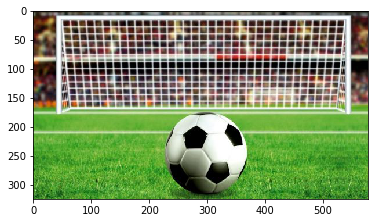

In [48]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = np.array(Image.open('football.jpg'))
plt.imshow(img, interpolation='nearest')

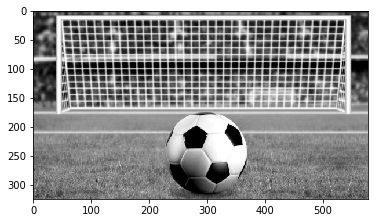

In [49]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

plt.imshow(gray, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

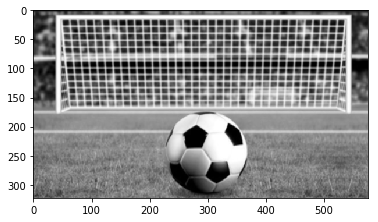

In [50]:
# STEP 1

# Gaussian Blur

gaussian_kernel = np.array([[1/16, 1/8, 1/16], 
                           [1/8, 1/4, 1/8],
                           [1/16, 1/4, 1/16]])

blurred_img = np.zeros((gray.shape[0]-2, gray.shape[1]-2))

for i in range(gray.shape[0]-2):
    for j in range(gray.shape[1]-2):
        blurred_img[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], gaussian_kernel))

plt.imshow(blurred_img, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

In [51]:
# STEP 2

## x sobel filter ##

sobel_kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
sobelx = np.zeros((blurred_img.shape[0]-2, blurred_img.shape[1]-2))

for i in range(blurred_img.shape[0]-2):
    for j in range(blurred_img.shape[1]-2):
        sobelx[i][j] = np.sum(np.multiply(blurred_img[i:i+3, j:j+3], sobel_kernel_x))

In [52]:
## y sobel filter ##

sobel_kernel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
sobely = np.zeros((blurred_img.shape[0]-2, blurred_img.shape[1]-2))

for i in range(blurred_img.shape[0]-2):
    for j in range(blurred_img.shape[1]-2):
        sobely[i][j] = np.sum(np.multiply(blurred_img[i:i+3, j:j+3], sobel_kernel_y))

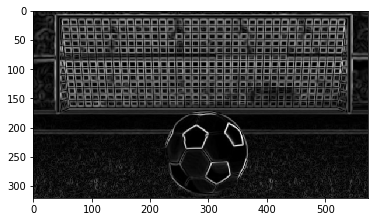

In [61]:
final_sobel = np.sqrt(sobelx**2 + sobely**2)
plt.imshow(final_sobel, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

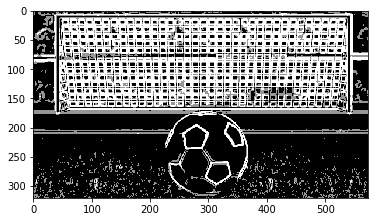

In [62]:
# STEP 4

# Double thresholding

threshold1 = 80
threshold2 = 20

for i in range(final_sobel.shape[0]):
    for j in range(final_sobel.shape[1]):
        if final_sobel[i][j] > 200:
            final_sobel[i][j] = 255
        elif final_sobel[i][j] > 100:
            final_sobel[i][j] = 150
        else:
            final_sobel[i][j] = 0
            
plt.imshow(final_sobel, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()